In [2]:
import pandas as pd


covid_df = pd.read_csv("Covid data.csv")

# Show basic info and head of the dataset
covid_df.info(), covid_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

(None,
    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
 0      2             1    1             1  03/05/2020       97          1   
 1      2             1    2             1  03/06/2020       97          1   
 2      2             1    2             2  09/06/2020        1          2   
 3      2             1    1             1  12/06/2020       97          2   
 4      2             1    2             1  21/06/2020       97          2   
 
    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
 0   65         2         2  ...       2        2             1              2   
 1   72        97         2  ...       2        2             1              2   
 2   55        97         1  ...       2        2             2              2   
 3   53         2         2  ...       2        2             2              2   
 4   68        97         1  ...       2        2             1              2   
 
    CARDIOVASCULAR  OBESITY  

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\1954490510.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sample_df['DATE_DIED'] = pd.to_datetime(sample_df['DATE_DIED'], errors='coerce')


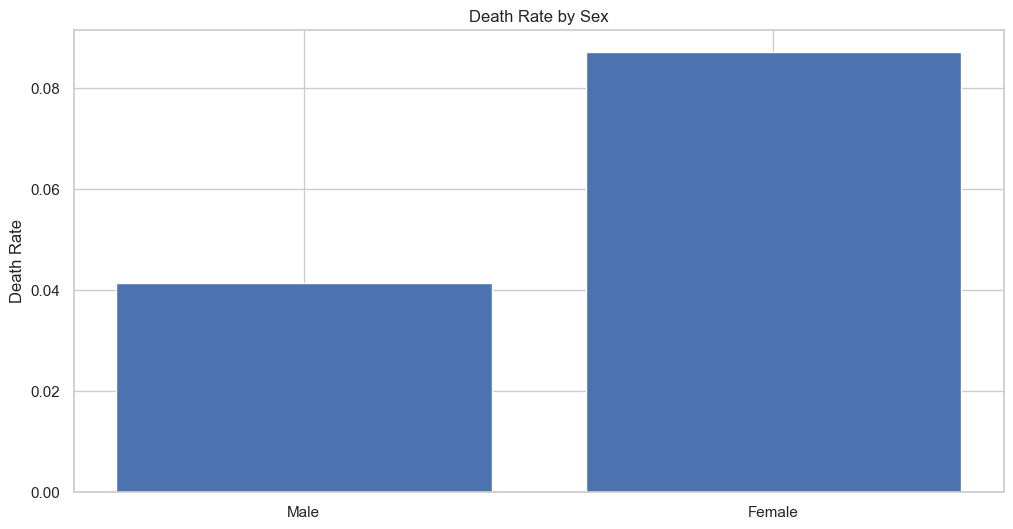

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\1954490510.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_by_age = sample_df.groupby('AGE_GROUP')['DIED'].mean()


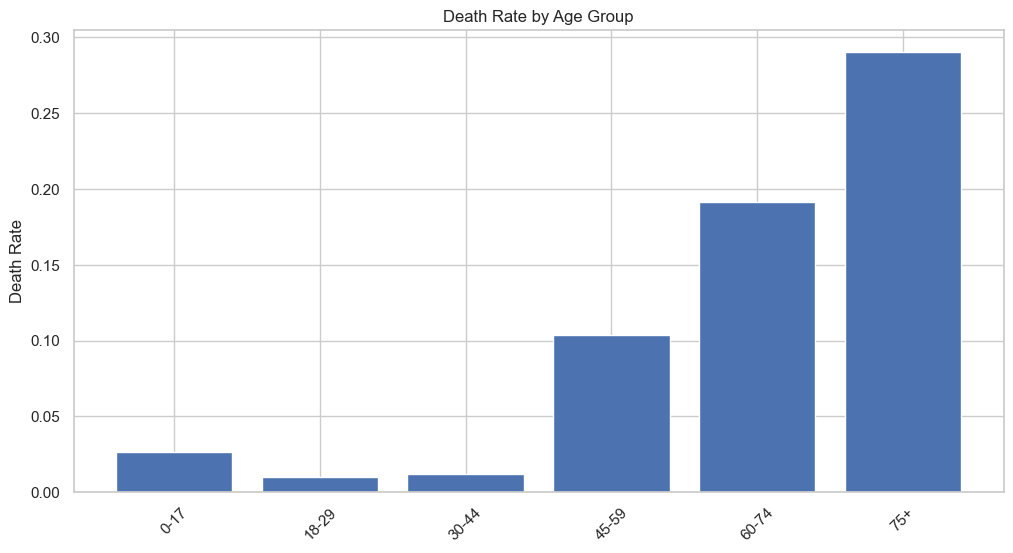

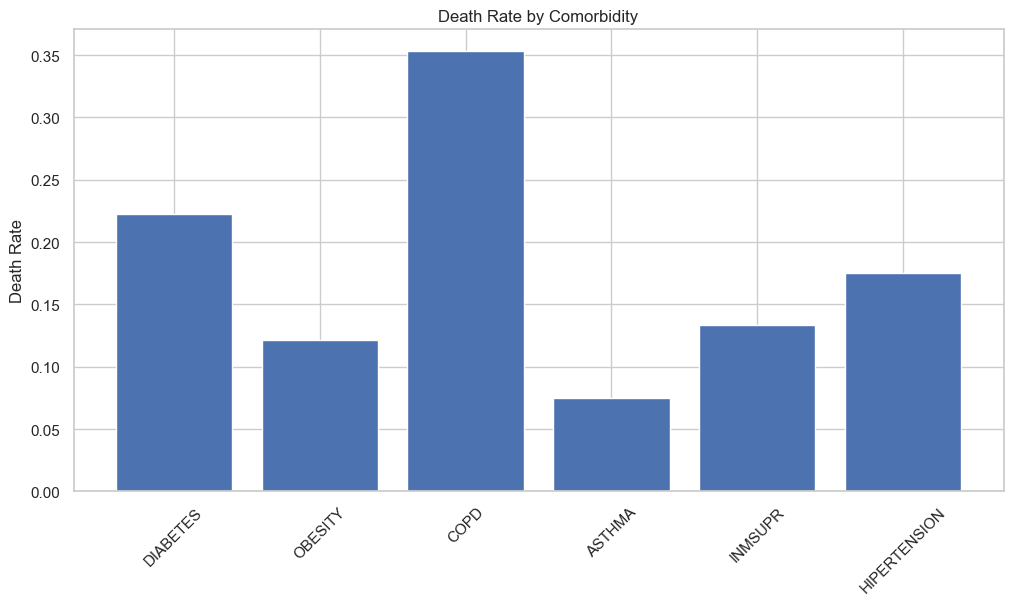

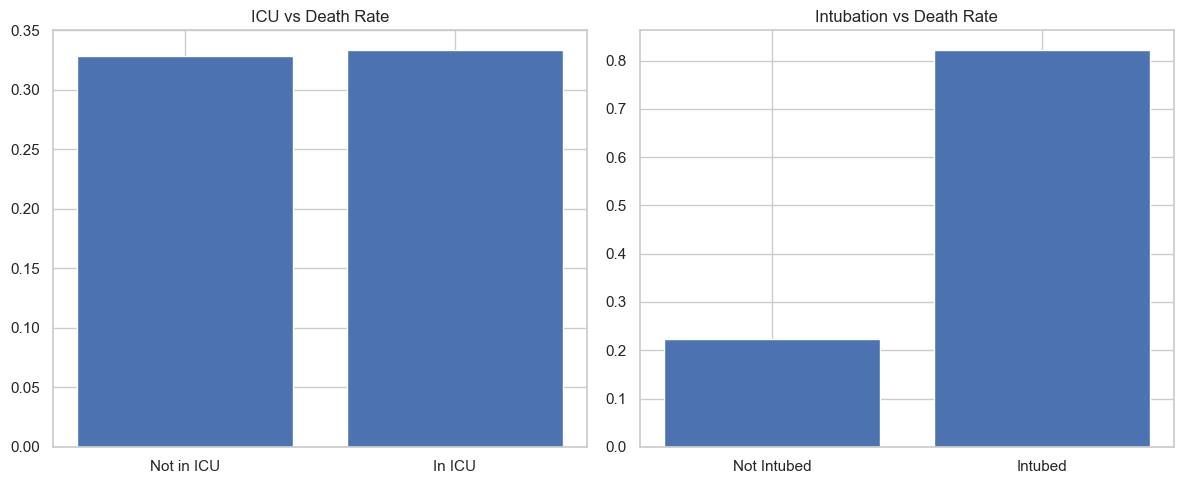

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load only the needed columns
columns_needed = [
    'SEX', 'AGE', 'DATE_DIED', 'DIABETES', 'OBESITY', 'COPD',
    'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'ICU', 'INTUBED'
]
df = pd.read_csv('Covid Data.csv', usecols=columns_needed)

# Sample 1000 rows for manageable analysis
sample_df = df.sample(n=1000, random_state=42)

# Replace invalid entries
for col in ['DIABETES', 'OBESITY', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'ICU', 'INTUBED']:
    sample_df[col] = sample_df[col].replace([97, 98, 99], pd.NA)

# Create 'DIED' column from DATE_DIED
sample_df['DATE_DIED'] = pd.to_datetime(sample_df['DATE_DIED'], errors='coerce')
sample_df['DIED'] = sample_df['DATE_DIED'].notna().astype(int)

# Death rate by sex
death_by_sex = sample_df.groupby('SEX')['DIED'].mean()
plt.bar(['Male', 'Female'], death_by_sex)
plt.title('Death Rate by Sex')
plt.ylabel('Death Rate')
plt.show()

# Death rate by age group
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']
sample_df['AGE_GROUP'] = pd.cut(sample_df['AGE'], bins=bins, labels=labels, right=False)
death_by_age = sample_df.groupby('AGE_GROUP')['DIED'].mean()
plt.bar(death_by_age.index.astype(str), death_by_age.values)
plt.title('Death Rate by Age Group')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.show()

# Comorbidity impact
comorbidities = ['DIABETES', 'OBESITY', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION']
comorbidity_death_rate = {
    condition: sample_df[sample_df[condition] == 1]['DIED'].mean()
    for condition in comorbidities
}
plt.bar(comorbidity_death_rate.keys(), comorbidity_death_rate.values())
plt.title("Death Rate by Comorbidity")
plt.ylabel("Death Rate")
plt.xticks(rotation=45)
plt.show()

# ICU and intubation effect
icu_impact = sample_df.groupby('ICU')['DIED'].mean()
intubed_impact = sample_df.groupby('INTUBED')['DIED'].mean()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(['Not in ICU', 'In ICU'], [icu_impact.get(2, 0), icu_impact.get(1, 0)])
axs[0].set_title("ICU vs Death Rate")
axs[1].bar(['Not Intubed', 'Intubed'], [intubed_impact.get(2, 0), intubed_impact.get(1, 0)])
axs[1].set_title("Intubation vs Death Rate")
plt.tight_layout()
plt.show()
